In [335]:
import pandas as pd
df = pd.read_csv("forestdata.csv")
df.head()

,collector.id,c.score,l.score,rain,tree.age,surface.litter,wind.intensity,humidity,tree.density,month,time.of.day,fire
0,5,13.11,3.421591,0.477187,34.66,6.718047,3.335635,52.0,0.69860,8,afternoon,1
1,7,11.99,2.874611,0.212425,19.39,6.242029,3.127024,59.0,0.62020,4,morning,0
2,6,12.91,2.827774,0.118141,15.75,6.397929,3.052446,60.0,0.58235,10,night,0
3,5,12.06,2.772961,0.097565,13.25,6.278146,3.114239,60.0,0.57025,9,afternoon,1
4,2,15.06,3.271684,0.438121,47.14,6.932448,3.214831,51.0,0.71150,7,morning,1


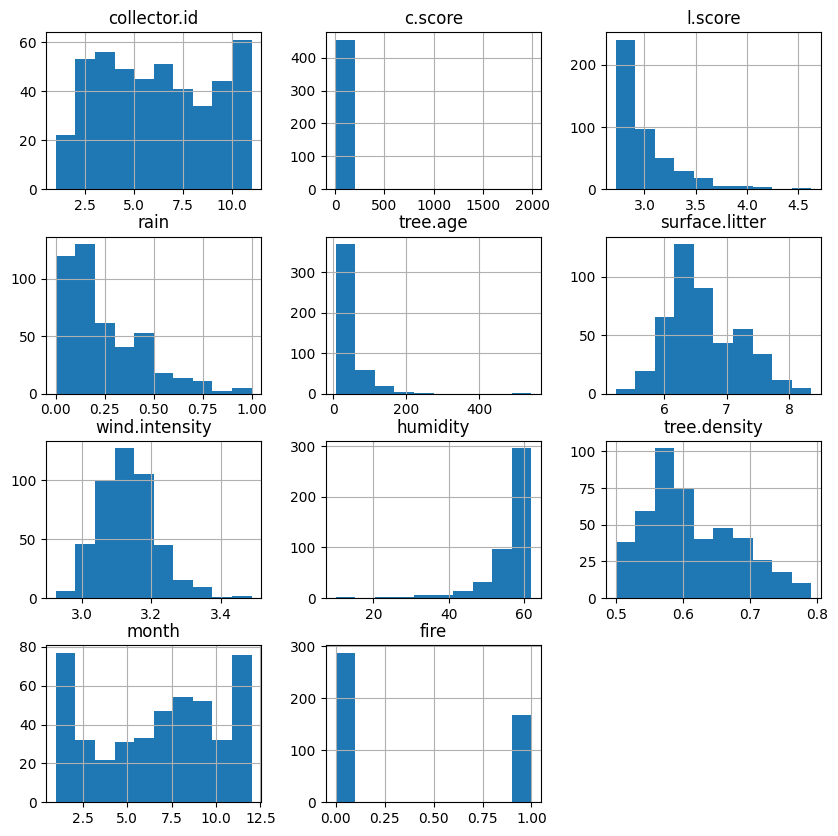

In [336]:

import matplotlib.pyplot as plt
df.hist(figsize=(10,10))
plt.show()


In [337]:
df.isnull().sum()

collector.id      0
c.score           0
l.score           1
rain              1
tree.age          1
surface.litter    0
wind.intensity    1
humidity          3
tree.density      0
month             0
time.of.day       0
fire              0
dtype: int64

In [338]:

df.fillna(df.mean(), inplace=True)


<ipython-input-338-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [339]:
df.isnull().sum()

collector.id      0
c.score           0
l.score           0
rain              0
tree.age          0
surface.litter    0
wind.intensity    0
humidity          0
tree.density      0
month             0
time.of.day       0
fire              0
dtype: int64

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   collector.id    456 non-null    int64  
 1   c.score         456 non-null    float64
 2   l.score         456 non-null    float64
 3   rain            456 non-null    float64
 4   tree.age        456 non-null    float64
 5   surface.litter  456 non-null    float64
 6   wind.intensity  456 non-null    float64
 7   humidity        456 non-null    float64
 8   tree.density    456 non-null    float64
 9   month           456 non-null    int64  
 10  time.of.day     456 non-null    object 
 11  fire            456 non-null    int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 42.9+ KB


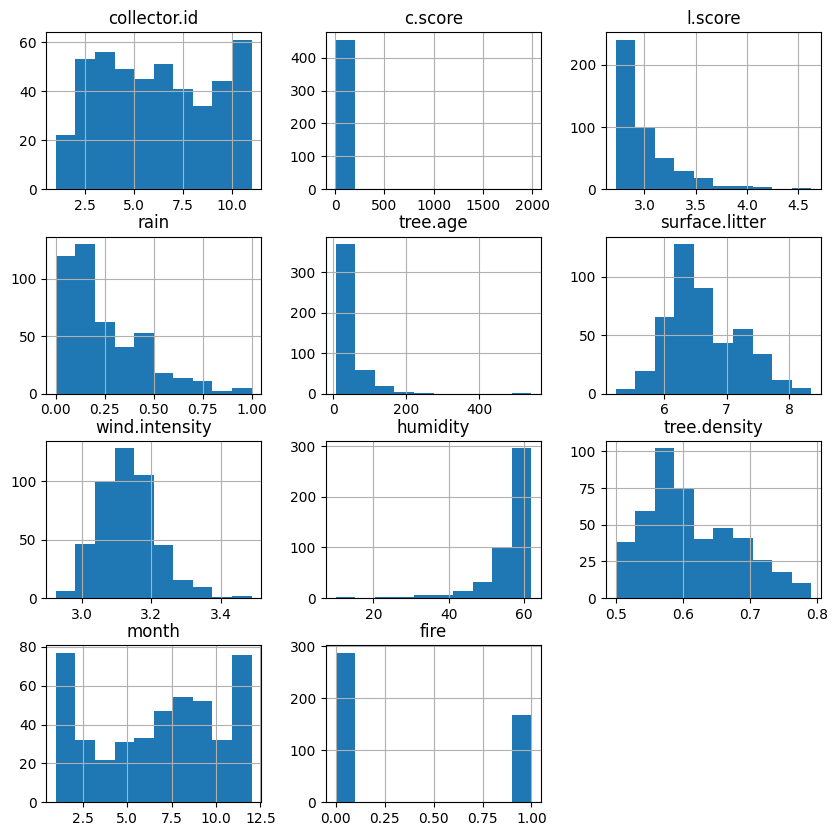

In [341]:
df.hist(figsize=(10,10))
plt.show()

In [342]:
df['time.of.day'].unique()

array(['afternoon', 'morning', 'night', 'morni7ng'], dtype=object)

In [343]:
df['time.of.day'] = df['time.of.day'].replace('morni7ng', 'morning')


In [344]:

df['time.of.day'] = df['time.of.day'].replace('afternoon', '1')
df['time.of.day'] = df['time.of.day'].replace('night', '2')
df['time.of.day'] = df['time.of.day'].replace('morning', '3')


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   collector.id    456 non-null    int64  
 1   c.score         456 non-null    float64
 2   l.score         456 non-null    float64
 3   rain            456 non-null    float64
 4   tree.age        456 non-null    float64
 5   surface.litter  456 non-null    float64
 6   wind.intensity  456 non-null    float64
 7   humidity        456 non-null    float64
 8   tree.density    456 non-null    float64
 9   month           456 non-null    int64  
 10  time.of.day     456 non-null    object 
 11  fire            456 non-null    int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 42.9+ KB


In [346]:
df.head()

,collector.id,c.score,l.score,rain,tree.age,surface.litter,wind.intensity,humidity,tree.density,month,time.of.day,fire
0,5,13.11,3.421591,0.477187,34.66,6.718047,3.335635,52.0,0.69860,8,1,1
1,7,11.99,2.874611,0.212425,19.39,6.242029,3.127024,59.0,0.62020,4,3,0
2,6,12.91,2.827774,0.118141,15.75,6.397929,3.052446,60.0,0.58235,10,2,0
3,5,12.06,2.772961,0.097565,13.25,6.278146,3.114239,60.0,0.57025,9,1,1
4,2,15.06,3.271684,0.438121,47.14,6.932448,3.214831,51.0,0.71150,7,3,1


In [347]:
df['time.of.day'].unique()

array(['1', '3', '2'], dtype=object)

In [348]:

df.duplicated().sum()


0

In [349]:
df.count()

collector.id      456
c.score           456
l.score           456
rain              456
tree.age          456
surface.litter    456
wind.intensity    456
humidity          456
tree.density      456
month             456
time.of.day       456
fire              456
dtype: int64

In [350]:
df['collector.id'].unique()

array([ 5,  7,  6,  2,  8,  9, 10,  1,  4,  3, 11])

In [351]:
df['fire'].unique()


array([1, 0])

# **Logestic Regresssion(LR) Model**

In [352]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [353]:
X = df.drop(columns=['fire'])
y= df['fire']

In [355]:
X

,collector.id,c.score,l.score,rain,tree.age,surface.litter,wind.intensity,humidity,tree.density,month,time.of.day
0,5,13.110,3.421591,0.477187,34.66,6.718047,3.335635,52.0,0.69860,8,1
1,7,11.990,2.874611,0.212425,19.39,6.242029,3.127024,59.0,0.62020,4,3
2,6,12.910,2.827774,0.118141,15.75,6.397929,3.052446,60.0,0.58235,10,2
3,5,12.060,2.772961,0.097565,13.25,6.278146,3.114239,60.0,0.57025,9,1
4,2,15.060,3.271684,0.438121,47.14,6.932448,3.214831,51.0,0.71150,7,3
...,...,...,...,...,...,...,...,...,...,...,...
451,5,11.340,2.865292,0.094384,16.41,6.250168,3.271296,58.0,0.58278,3,1
452,10,13.700,2.847752,0.157058,20.64,6.531606,3.087569,60.0,0.59077,9,2
453,6,9.720,2.718282,0.000000,21.69,5.716370,2.926373,62.0,0.50000,2,1
454,9,13.170,2.962686,0.261034,14.49,6.607596,3.196904,52.0,0.66070,6,2


In [356]:
df

,collector.id,c.score,l.score,rain,tree.age,surface.litter,wind.intensity,humidity,tree.density,month,time.of.day,fire
0,5,13.110,3.421591,0.477187,34.66,6.718047,3.335635,52.0,0.69860,8,1,1
1,7,11.990,2.874611,0.212425,19.39,6.242029,3.127024,59.0,0.62020,4,3,0
2,6,12.910,2.827774,0.118141,15.75,6.397929,3.052446,60.0,0.58235,10,2,0
3,5,12.060,2.772961,0.097565,13.25,6.278146,3.114239,60.0,0.57025,9,1,1
4,2,15.060,3.271684,0.438121,47.14,6.932448,3.214831,51.0,0.71150,7,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
451,5,11.340,2.865292,0.094384,16.41,6.250168,3.271296,58.0,0.58278,3,1,0
452,10,13.700,2.847752,0.157058,20.64,6.531606,3.087569,60.0,0.59077,9,2,0
453,6,9.720,2.718282,0.000000,21.69,5.716370,2.926373,62.0,0.50000,2,1,0
454,9,13.170,2.962686,0.261034,14.49,6.607596,3.196904,52.0,0.66070,6,2,1


In [357]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [358]:


LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [359]:


trainAcc = LR_model.score(X_train, y_train)
validationACC = LR_model.score(X_val_scaled, y_val)
testAcc = LR_model.score(X_test, y_test)

print("Training Accuracy of logestic Regression Model is :", trainAcc)
print("Validation Accuracy:", validationACC)
print("Testing Accuracy of the Logestic Regreesion Model is:", testAcc)


Training Accuracy of logestic Regression Model is : 0.8901098901098901
Validation Accuracy: 0.9230769230769231
Testing Accuracy of the Logestic Regreesion Model is: 0.8586956521739131


In [360]:
from sklearn.metrics import precision_score, f1_score
precision = precision_score(y_test, LR_model.predict(X_test))
f1 = f1_score(y_test, LR_model.predict(X_test))

print("Precision:", precision)
print("F1 Score:", f1)


Precision: 0.8571428571428571
F1 Score: 0.8219178082191781


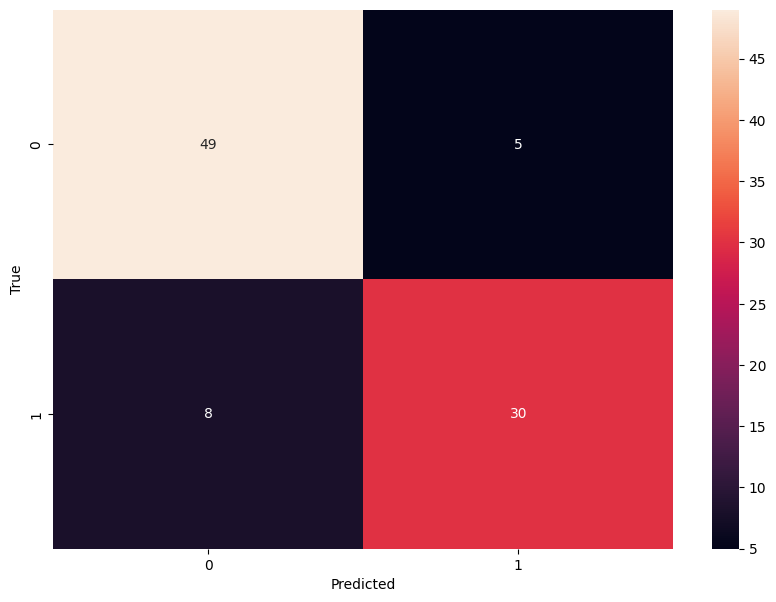

In [361]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, LR_model.predict(X_test))

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [362]:

def predict_fire():
    collector_id = int(input("Enter collector ID(1-11): "))
    c_score = float(input("Enter c.score: "))
    l_score = float(input("Enter l.score: "))
    rain = float(input("Enter rain: "))
    tree_age = float(input("Enter tree age: "))
    surface_litter = float(input("Enter surface litter: "))
    wind_intensity = float(input("Enter wind intensity: "))
    humidity = float(input("Enter humidity: "))
    tree_density = float(input("Enter tree density: "))
    month = int(input("Enter month (1-12): "))
    time_of_day = int(input("Enter time of day (1 for afternoon, 2 for morning, 3 for night): "))

    user_data = pd.DataFrame([[collector_id, c_score, l_score, rain, tree_age, surface_litter,
                               wind_intensity, humidity, tree_density, month, time_of_day]],
                             columns=X.columns)

    # Scale  inputs
    user_data_scaled = scaler.transform(user_data)


    prediction = LR_model.predict(user_data_scaled)
    if prediction[0] == 1:
        print("The predicted result is: Fire")
    else:
        print("The predicted result is: No Fire")

predict_fire()


Enter collector ID(1-11): 1
Enter c.score: 1
Enter l.score: 1
Enter rain: 1
Enter tree age: 1
Enter surface litter: 1
Enter wind intensity: 1
Enter humidity: 1
Enter tree density: 1
Enter month (1-12): 1
Enter time of day (1 for afternoon, 2 for morning, 3 for night): 1
The predicted result is: No Fire


# **Decession Tree Model(DT)**

In [363]:
from sklearn.tree import DecisionTreeClassifier

In [364]:
DTmodel = DecisionTreeClassifier()

DTmodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [365]:
trainAcc = DTmodel.score(X_train, y_train)
validationACC = DTmodel.score(X_val_scaled, y_val)

testAcc = DTmodel.score(X_test, y_test)

print("Training Accuracy of descession Tree Model is :", trainAcc)
print("Validation Accuracy of decession treee model is :", validationACC)
print("Testing Accuracy of the Decession tree Model is :", testAcc)


Training Accuracy of descession Tree Model is : 1.0
Validation Accuracy of decession treee model is : 0.9120879120879121
Testing Accuracy of the Decession tree Model is : 0.8804347826086957


In [366]:
from sklearn.metrics import precision_score, f1_score
precision = precision_score(y_test, DTmodel.predict(X_test))
f1 = f1_score(y_test, DTmodel.predict(X_test))

print("Precision:", precision)
print("F1 Score:", f1)


Precision: 0.8648648648648649
F1 Score: 0.8533333333333334


In [367]:

def predict_fire():
    collector_id = int(input("Enter collector ID(1-11): "))
    c_score = float(input("Enter c.score: "))
    l_score = float(input("Enter l.score: "))
    rain = float(input("Enter rain: "))
    tree_age = float(input("Enter tree age: "))
    surface_litter = float(input("Enter surface litter: "))
    wind_intensity = float(input("Enter wind intensity: "))
    humidity = float(input("Enter humidity: "))
    tree_density = float(input("Enter tree density: "))
    month = int(input("Enter month (1-12): "))
    time_of_day = int(input("Enter time of day (1 for afternoon, 2 for morning, 3 for night): "))

    # Create a DataFrame with user input
    user_data = pd.DataFrame([[collector_id, c_score, l_score, rain, tree_age, surface_litter,
                               wind_intensity, humidity, tree_density, month, time_of_day]],
                             columns=X.columns)

    # Scale the user input
    user_data_scaled = scaler.transform(user_data)

    # Predict the result
    prediction = DTmodel.predict(user_data_scaled)
    if prediction[0] == 1:
        print("The predicted result is: Fire")
    else:
        print("The predicted result is: No Fire")

predict_fire()


Enter collector ID(1-11): 1
Enter c.score: 1
Enter l.score: 1
Enter rain: 1
Enter tree age: 1
Enter surface litter: 1
Enter wind intensity: 1
Enter humidity: 1
Enter tree density: 1
Enter month (1-12): 1
Enter time of day (1 for afternoon, 2 for morning, 3 for night): 1
The predicted result is: No Fire


# **Neural Network (NN) Model**

In [368]:
from sklearn.neural_network import MLPClassifier

In [369]:
NN_model = MLPClassifier()
NN_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [370]:
trainAcc = NN_model.score(X_train, y_train)
validationACC = NN_model.score(X_val_scaled, y_val)
testAcc = NN_model.score(X_test, y_test)

print("Training Accuracy of neural Network Model:", trainAcc)
print("Validation Accuracy of this model is : ",validationACC)
print("Testing Accuracy of Neural network model:", testAcc)

Training Accuracy of neural Network Model: 0.9304029304029304
Validation Accuracy of this model is :  0.9560439560439561
Testing Accuracy of Neural network model: 0.8695652173913043


In [371]:
from sklearn.metrics import precision_score, f1_score
precision = precision_score(y_test, LR_model.predict(X_test))
f1 = f1_score(y_test, LR_model.predict(X_test))

# Print the results
print("Precision:", precision)
print("F1 Score:", f1)


Precision: 0.8571428571428571
F1 Score: 0.8219178082191781


In [372]:

def predict_fire():
    collector_id = int(input("Enter collector ID: "))
    c_score = float(input("Enter c.score: "))
    l_score = float(input("Enter l.score: "))
    rain = float(input("Enter rain: "))
    tree_age = float(input("Enter tree age: "))
    surface_litter = float(input("Enter surface litter: "))
    wind_intensity = float(input("Enter wind intensity: "))
    humidity = float(input("Enter humidity: "))
    tree_density = float(input("Enter tree density: "))
    month = int(input("Enter month (1-12): "))
    time_of_day = int(input("Enter time of day (1 for afternoon, 2 for morning, 3 for night): "))


    user_data = pd.DataFrame([[collector_id, c_score, l_score, rain, tree_age, surface_litter,
                               wind_intensity, humidity, tree_density, month, time_of_day]],
                             columns=X.columns)

    # Scale the input values
    user_data_scaled = scaler.transform(user_data)

    prediction = NN_model.predict(user_data_scaled)
    if prediction[0] == 1:
        print("The predicted result is: Fire")
    else:
        print("The predicted result is: No Fire")

predict_fire()


Enter collector ID: 1
Enter c.score: 1
Enter l.score: 1
Enter rain: 1
Enter tree age: 1
Enter surface litter: 1
Enter wind intensity: 1
Enter humidity: 1
Enter tree density: 1
Enter month (1-12): 1
Enter time of day (1 for afternoon, 2 for morning, 3 for night): 1
The predicted result is: No Fire


## **models Hyperparameters\**

In [373]:
import pandas as pd
from tabulate import tabulate

data = {
    "Model": ["MLP Classifier", "Decision Tree", "Logistic Regression"],
    "Hyperparameters": [
        "hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, max_iter=200",
        "criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1",
        "penalty='l2', C=1.0, solver='lbfgs'"
    ],
    "Accuracy": [0.85, 0.88, 0.85],
    "F1 Score": [0.82, 0.86, 0.82],
    "Precision": [0.85, 0.85, 0.85]
}

df = pd.DataFrame(data)

# Display the DataFrame as a formatted table
print(tabulate(df, headers='keys', tablefmt='pipe', showindex=False))


| Model               | Hyperparameters                                                                         |   Accuracy |   F1 Score |   Precision |
|:--------------------|:----------------------------------------------------------------------------------------|-----------:|-----------:|------------:|
| MLP Classifier      | hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, max_iter=200 |       0.85 |       0.82 |        0.85 |
| Decision Tree       | criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1               |       0.88 |       0.86 |        0.85 |
| Logistic Regression | penalty='l2', C=1.0, solver='lbfgs'                                                     |       0.85 |       0.82 |        0.85 |
